# Plot example non-localized endmembers used for unmixing 

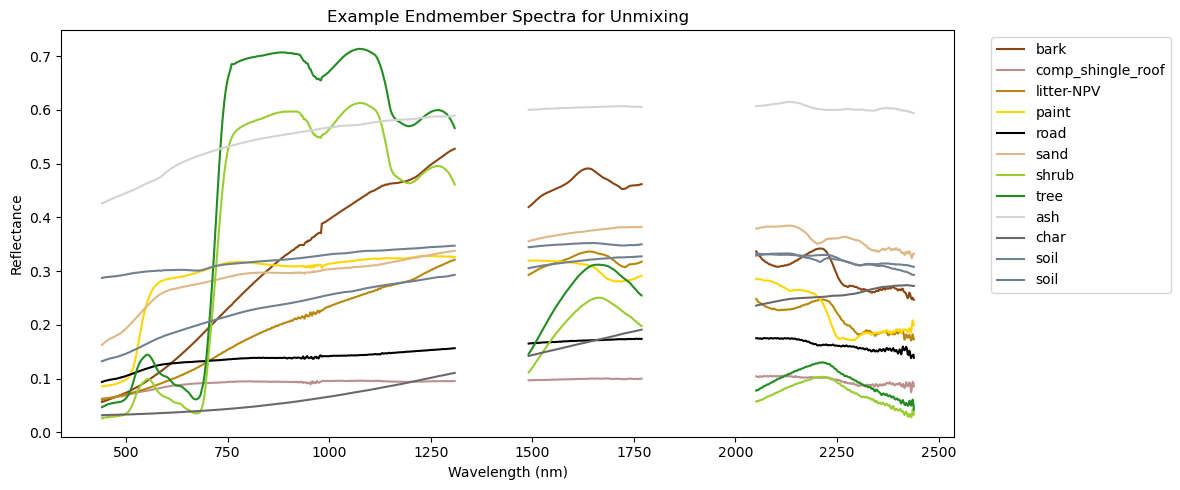

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Parameters ---
csv_path = "/Volumes/GEOG/Structure_classification/figures/ems_plot.csv"  

# Wavelength regions to omit (will show as gaps)
bad_regions = [
    (0, 440),          
    (1310, 1490),      
    (1770, 2050),      
    (2440, 2880)      
]

# Custom colors
custom_colors = {
    "bark": "saddlebrown",
    "comp_shingle_roof": "rosybrown",
    "litter-NPV": "darkgoldenrod",
    "paint": "gold",
    "road": "black",
    "sand": "burlywood",
    "shrub": "yellowgreen",
    "tree": "forestgreen",
    "ash": "lightgrey",
    "char": "dimgrey",
    "soil": "slategrey",
    "soil": "slategrey"
}

# --- Load CSV ---
df = pd.read_csv(csv_path, header=0)
endmember_names = df.iloc[:, 0]
wavelengths = df.columns[1:].astype(float)
spectra = df.iloc[:, 1:].astype(float).values
wl_array = np.array(wavelengths)

# --- Apply gaps (set NaN in bad wavelength regions) ---
bad_mask = np.zeros_like(wl_array, dtype=bool)
for start, end in bad_regions:
    bad_mask |= (wl_array >= start) & (wl_array <= end)

spectra_with_gaps = np.where(bad_mask, np.nan, spectra)

# --- Plot ---
plt.figure(figsize=(12, 5))
for i, spectrum in enumerate(spectra_with_gaps):
    name = endmember_names[i]
    color = custom_colors.get(name, "blue")
    plt.plot(wl_array, spectrum, label=name, color=color)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Example Endmember Spectra for Unmixing")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.tight_layout()
plt.show()
